In [1]:
train_dir = 'D:/Documentos/Estudio/Maestria/1-Periodo/Aprendizaje_Computacional/Modelopropio/Database/Lung Segmentation Data/Lung Segmentation Data/Train' 
val_dir = 'D:/Documentos/Estudio/Maestria/1-Periodo/Aprendizaje_Computacional/Modelopropio/Database/Lung Segmentation Data/Lung Segmentation Data/Val' 
test_dir = 'D:/Documentos/Estudio/Maestria/1-Periodo/Aprendizaje_Computacional/Modelopropio/Database/Lung Segmentation Data/Lung Segmentation Data/Test'

In [2]:
#ELEGIMOS LOS PARAMETROS
from keras.preprocessing.image import ImageDataGenerator
ih, iw = 256,256 #tamano de la imagen
input_shape = (ih, iw, 3) #forma de la imagen: alto ancho y numero de canales

num_class = 2 #cuantas clases 
#epochs = 15 #cuantas veces entrenar. En cada epoch hace una mejora en los parametros

batch_size = 32 #batch para hacer cada entrenamiento. Lee 50 'batch_size' imagenes antes de actualizar los parametros. Las carga a memoria
num_train = 21715 #numero de imagenes en train
num_test = 6788 #numero de imagenes en test
num_val=5417

epoch_steps = num_train // batch_size 
test_steps = num_test // batch_size


In [3]:
#LEEMOS LAS IMÁGENES 

img_height, img_width=ih, iw

train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical') # set as training data

validation_generator = train_datagen.flow_from_directory(
    val_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical') # set as validation data

test_generator = train_datagen.flow_from_directory(
    test_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical') # set as validation data

Found 14507 images belonging to 2 classes.
Found 3615 images belonging to 2 classes.
Found 4535 images belonging to 2 classes.


In [4]:
train=train_generator
val=validation_generator
test=test_generator

In [13]:
from keras.applications import MobileNetV2 
from keras.models import Model 
import keras 


MobileNetV2_model = MobileNetV2 (include_top=False, weights='imagenet',  
                                     input_shape=input_shape) 

MobileNetV2_model.trainable =False


In [14]:
import pandas as pd 
pd.set_option('max_colwidth', -1)

layers = [(layer, layer.name, layer.trainable) for layer in MobileNetV2_model.layers] 
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

C:\Users\elium\AppData\Local\Temp\ipykernel_17544\1935218378.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)


,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x000001AA655F11B0>,input_2,False
1,<keras.layers.convolutional.conv2d.Conv2D object at 0x000001AA652D8B80>,Conv1,False
2,<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x000001AA65B1BF40>,bn_Conv1,False
3,<keras.layers.activation.relu.ReLU object at 0x000001AA652D9180>,Conv1_relu,False
4,<keras.layers.convolutional.depthwise_conv2d.DepthwiseConv2D object at 0x000001ACCC806200>,expanded_conv_depthwise,False
...,...,...,...
149,<keras.layers.convolutional.conv2d.Conv2D object at 0x000001ACD2D71ED0>,block_16_project,False
150,<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x000001ACD2D0A980>,block_16_project_BN,False
151,<keras.layers.convolutional.conv2d.Conv2D object at 0x000001ACD2D72410>,Conv_1,False
152,<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x000001ACD2D70A90>,Conv_1_bn,False


In [15]:
print(MobileNetV2_model.summary())

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 128, 128, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 128, 128, 32  128         ['Conv1[0][0]']                  
                                )                                              

 block_3_expand_relu (ReLU)     (None, 64, 64, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 65, 65, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 32, 32, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 32, 32, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 16, 16, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 16, 16, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 16, 16, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 16, 16, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 16, 16, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 16, 16, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 16, 16, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 16, 16, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 8, 8, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 8, 8, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 8, 8, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 8, 8, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [16]:
from os import listdir
from os.path import isfile,isdir, join
import numpy

import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras import layers, models
from keras.models import Sequential
from keras.layers import Dense,Conv2D, Dropout,Activation,MaxPooling2D,Flatten
from keras.optimizers import RMSprop 
from sklearn.model_selection import train_test_split

In [17]:
from keras import backend as K
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [18]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer, GlobalAveragePooling2D 
from keras.models import Sequential 
from keras import optimizers  
import tensorflow as tf

# build model architecture 
model = Sequential() 

model.add(MobileNetV2_model)
model.add(Flatten()) 

model.add(Dense(num_class, activation='sigmoid'))

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.0001, momentum=0.9), 
      loss = tf.keras.losses.CategoricalCrossentropy(from_logits = True), 
      metrics=['accuracy',f1_m,precision_m, recall_m])

C:\Users\elium\.conda\envs\enviromentalGPU\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [19]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 8, 8, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_1 (Flatten)         (None, 81920)             0         
                                                                 
 dense_1 (Dense)             (None, 2)                 163842    
                                                                 
Total params: 2,421,826
Trainable params: 163,842
Non-trainable params: 2,257,984
_________________________________________________________________
None


In [20]:
history = model.fit_generator(train, 
                              epochs=15,  
                              validation_data=val,  
                              verbose=1)

Epoch 1/15


C:\Users\elium\AppData\Local\Temp\ipykernel_17544\1271991653.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train,
C:\Users\elium\.conda\envs\enviromentalGPU\lib\site-packages\keras\backend.py:5531: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


454/454 [==============================] - 30s 62ms/step - loss: 0.2307 - accuracy: 0.9158 - f1_m: 0.8910 - precision_m: 0.9171 - recall_m: 0.8683 - val_loss: 0.1669 - val_accuracy: 0.9408 - val_f1_m: 0.9222 - val_precision_m: 0.9436 - val_recall_m: 0.9029
Epoch 2/15
454/454 [==============================] - 27s 60ms/step - loss: 0.0952 - accuracy: 0.9638 - f1_m: 0.9477 - precision_m: 0.9664 - recall_m: 0.9306 - val_loss: 0.1154 - val_accuracy: 0.9585 - val_f1_m: 0.9450 - val_precision_m: 0.9658 - val_recall_m: 0.9261
Epoch 3/15
454/454 [==============================] - 27s 60ms/step - loss: 0.0505 - accuracy: 0.9819 - f1_m: 0.9645 - precision_m: 0.9787 - recall_m: 0.9515 - val_loss: 0.1477 - val_accuracy: 0.9502 - val_f1_m: 0.9343 - val_precision_m: 0.9511 - val_recall_m: 0.9192
Epoch 4/15
454/454 [==============================] - 28s 62ms/step - loss: 0.0293 - accuracy: 0.9915 - f1_m: 0.9741 - precision_m: 0.9880 - recall_m: 0.9613 - val_loss: 0.1143 - val_accuracy: 0.9591 - val_f

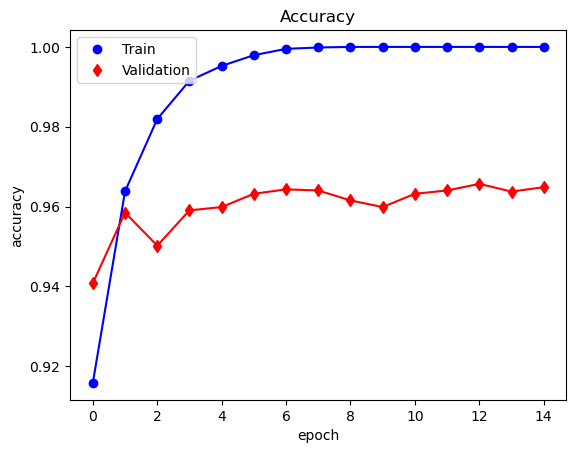

In [21]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],'o',color='blue')
plt.plot(history.history['val_accuracy'],'d',color='red')
plt.plot(history.history['accuracy'],color='blue')
plt.plot(history.history['val_accuracy'],color='red')
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

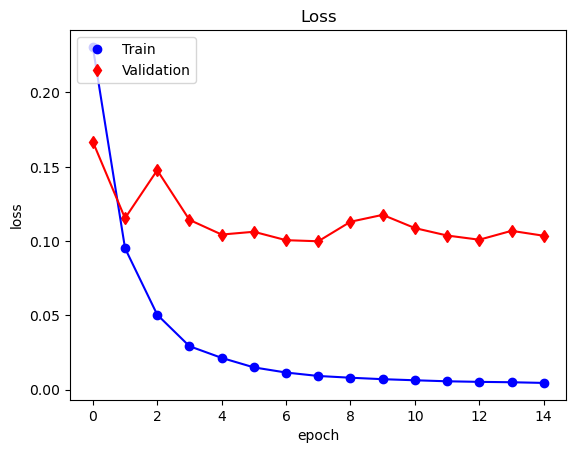

In [22]:
plt.plot(history.history['loss'],'o',color='blue')
plt.plot(history.history['val_loss'],'d',color='red')
plt.plot(history.history['loss'],color='blue')
plt.plot(history.history['val_loss'],color='red')
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

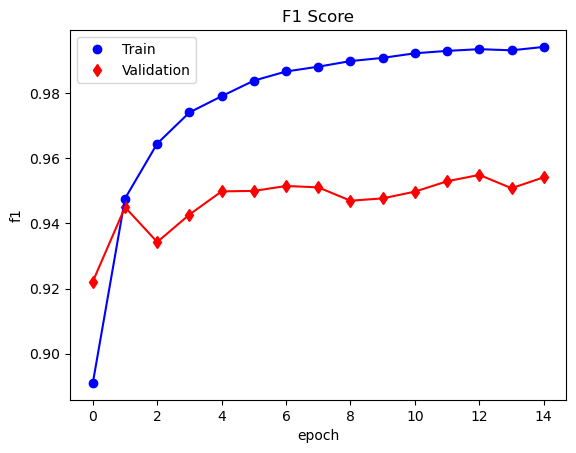

In [23]:
plt.plot(history.history['f1_m'],'o',color='blue')
plt.plot(history.history['val_f1_m'],'d',color='red')
plt.plot(history.history['f1_m'],color='blue')
plt.plot(history.history['val_f1_m'],color='red')
plt.title('F1 Score')
plt.ylabel('f1')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

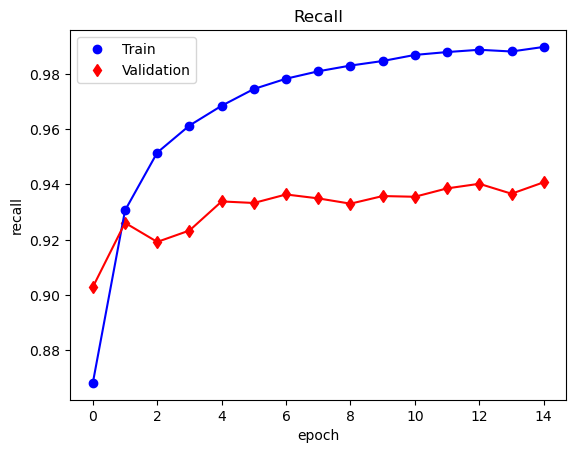

In [24]:
plt.plot(history.history['recall_m'],'o',color='blue')
plt.plot(history.history['val_recall_m'],'d',color='red')
plt.plot(history.history['recall_m'],color='blue')
plt.plot(history.history['val_recall_m'],color='red')
plt.title('Recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

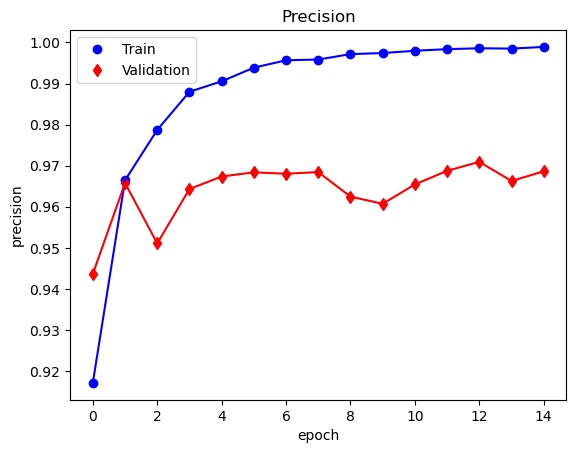

In [25]:
plt.plot(history.history['precision_m'],'o',color='blue')
plt.plot(history.history['val_precision_m'],'d',color='red')
plt.plot(history.history['precision_m'],color='blue')
plt.plot(history.history['val_precision_m'],color='red')
plt.title('Precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [26]:
test_eval = model.evaluate(test, verbose=1)
print('El modelo predice el ', test_eval[1]*100,'% de los datos')

142/142 [==============================] - 8s 54ms/step - loss: 0.0795 - accuracy: 0.9718 - f1_m: 0.9628 - precision_m: 0.9713 - recall_m: 0.9551
El modelo predice el  97.17750549316406 % de los datos


In [27]:
print('Utilizando el conjunto de datos de test para evaluar el modelo')
print('Loss: ',test_eval[0])
print('Accuracy: ',test_eval[1])
print('F1 Score: ',test_eval[2])
print('Precision: ',test_eval[3])
print('Recall: ',test_eval[4])

Utilizando el conjunto de datos de test para evaluar el modelo
Loss:  0.07954461127519608
Accuracy:  0.9717750549316406
F1 Score:  0.9627845883369446
Precision:  0.9712557792663574
Recall:  0.9551056623458862
